ДР4. Проверка статистических гипотез.
Задача 1.
====================

Нам нужно сравнить расходы за городом и в городе.

In [ ]:
# специальная штука, чтоб считывать с гугл-диска
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#  matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
from scipy import stats

In [ ]:
# удобная штука для печати двух гистограмм на 1 странице
def two_histograms(x, y):
    """
    Функция, которая построит две гистограммы на одной картинке.
    Дополнительно пунктирными линиями указываются средние значения выборок.
    x: вектор pd.Series,
    y: вектор pd.Series
    """
    x.hist(alpha=0.5, weights=[1./len(x)]*len(x))
    y.hist(alpha=0.5, weights=[1./len(y)]*len(y))
    plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='dashed')
    plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
    plt.legend([x.name, y.name])

In [ ]:
import os
os.chdir("/content/drive/My Drive/colab/AD/Data")


In [ ]:
df = pd.read_csv('data', sep='\s+')

In [ ]:
df.head()

,BED,MCDAYS,TDAYS,PCREV,NSAL,FEXP,RURAL
0,244,128,385,23521,5230,5334,0
1,59,155,203,9160,2459,493,1
2,120,281,392,21900,6304,6115,0
3,120,291,419,22354,6590,6346,0
4,120,238,363,17421,5362,6225,0


Сохраним в отдельные переменные выборки, которые собираемся сравнивать.

In [ ]:
x = df[df['RURAL'] == 1]['FEXP']
y = df[df['RURAL'] == 0]['FEXP']
x.name, y.name = 'village', 'city'

Теперь проверим оба распределения на нормальность. Пусть гипотеза H0 - распределение нормальное, H1 - распределение сильно отклонено от нормального. Теперь проверим гипотезы для наших распределений. Сначала посмотрим на гистограммы.

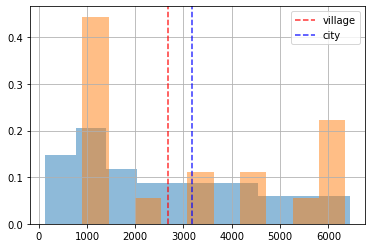

In [ ]:
two_histograms(x, y)

Ну, что-то совсем непонятное получилось. Где купола? Где вся красота? Ну, ладно. Постоим по-отдельности и посмотрим:

(array([5., 7., 4., 3., 3., 3., 3., 2., 2., 2.]),
 array([ 137. ,  767.5, 1398. , 2028.5, 2659. , 3289.5, 3920. , 4550.5,
        5181. , 5811.5, 6442. ]),
 <a list of 10 Patch objects>)

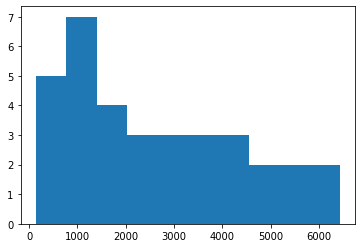

In [ ]:
plt.hist(x)

Выбросов не видно. Но и симметрия хромает, куполообразной формы - тоже не видно. Может, увеличить количество столбцов?

(array([5., 1., 7., 3., 3., 3., 1., 2., 2., 2., 2., 1., 2.]),
 array([ 137.,  622., 1107., 1592., 2077., 2562., 3047., 3532., 4017.,
        4502., 4987., 5472., 5957., 6442.]),
 <a list of 13 Patch objects>)

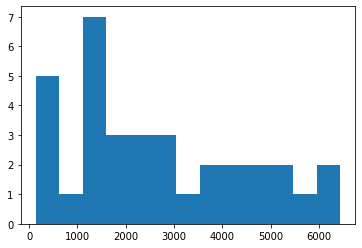

In [ ]:
plt.hist(x, bins = 13)

Ситуация понятней не стала. Может, уменьшить количество столбцов (уже надеюсь на чудо):

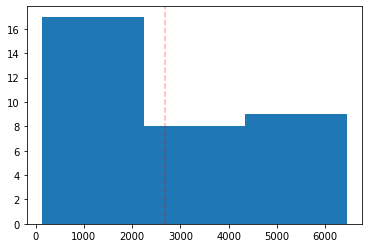

In [ ]:
plt.hist(x, bins = 3)
plt.axvline(x.mean(), color='red', alpha=0.3, linestyle='dashed')  # добавили среднее значение

Ну, совсем ничего не понятно! Вроде, не похоже на колокол. Но у нас такое маленькое количество испытаний! Надо построить колокол и посмотреть!

In [ ]:
mu = np.mean(x)
sigma = np.std(x)

#  Решетка точек для построения графика функции
x_1 = np.linspace(np.min(x), np.max(x), 10)

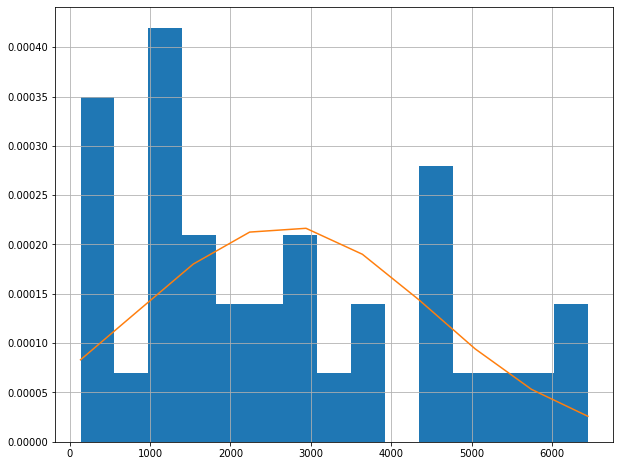

In [ ]:
#  Построим гистограмму
#  Добавим график плотности нормального распределения

plt.figure(figsize=(10,8))
pd.Series(x).hist(bins=15, density=1)
plt.plot(x_1, stats.norm.pdf(x_1, mu, sigma))

#  Пример добавления подписей на графике
#plt.text(2.0, 0.9, r'$f(x) = \frac{\exp(-(x-\mu)^2/2*\sigma^2)}{\sigma*\sqrt{2*\pi}}$',
#        fontsize=12)

#  plt.savefig("KDE_pres_05.png")

Сложно. В принципе, если сдвинуть пару боковых столбцов в центр...

Посмотрим тогда пока что y:

(array([8., 0., 1., 0., 2., 0., 2., 0., 1., 4.]),
 array([ 907. , 1450.9, 1994.8, 2538.7, 3082.6, 3626.5, 4170.4, 4714.3,
        5258.2, 5802.1, 6346. ]),
 <a list of 10 Patch objects>)

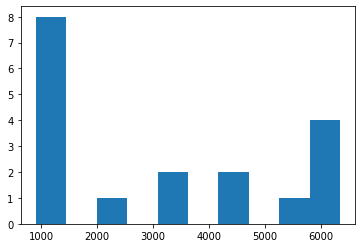

In [ ]:
plt.hist(y)

Ого! Это ж ещё хуже! Нет ни формы, ни симметрии (точнее, она даже немного присутствует, но совсем не так, как нужно). И дырки между столбцами! Откуда такая дискретность? Может, уменьшить количество столбцов?

(array([8., 1., 2., 2., 5.]),
 array([ 907. , 1994.8, 3082.6, 4170.4, 5258.2, 6346. ]),
 <a list of 5 Patch objects>)

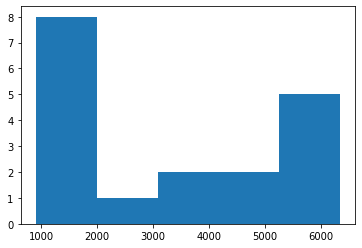

In [ ]:
plt.hist(y, bins = 5)

Вот. Промежутки пропали. Но колоколом и не пахнет. Тут тоже было бы хорошо нарисовать колокол. Сделаем это.

In [ ]:
mu = np.mean(y)
sigma = np.std(y)

#  Решетка точек для построения графика функции
x_1 = np.linspace(np.min(y), np.max(y), 10)

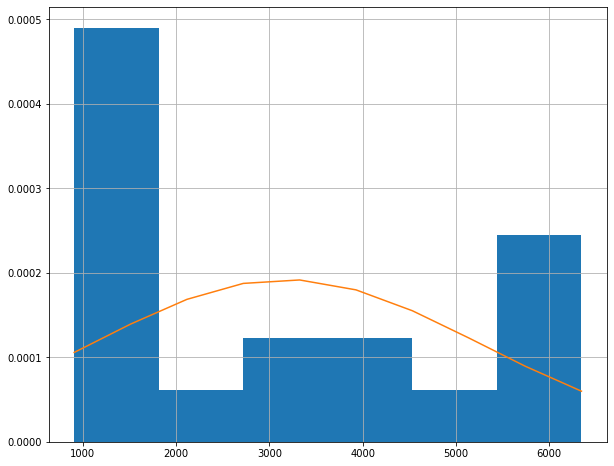

In [ ]:
#  Построим гистограмму
#  Добавим график плотности нормального распределения

plt.figure(figsize=(10,8))
pd.Series(y).hist(bins=6, density=1)
plt.plot(x_1, stats.norm.pdf(x_1, mu, sigma))


Сложно. Нужно думать.

## Что же делать?

А, я не хочу думать! Призову на помощь питон. Воспользуюсь критерием Шапиро-Уилка.

In [ ]:
res1 = stats.shapiro(x)
print('Для переменной x p-value: ', res1[1])

res2 = stats.shapiro(y)
print('Для переменной y p-value: ', res2[1])

Для переменной x p-value:  0.04017774015665054
Для переменной y p-value:  0.003969315439462662


Кажется, думать всё таки придётся. 
Результат можно интерпретировать по-разному. Для критерия 𝛼=0.05 
p-value получился для обоих распределений маленьким. Гипотеза о том, что распределение нормальное, отвергается. Для критерия 𝛼=0.001 значения p-value получилось больше, гипотеза не отвергается. (0.01 - вообще разобьет наши распределения на нормальное и отклонённое от нормального) 
Что же выбрать?
А я сделаю хитро! Я рассмотрю оба варианта и сравню результат. Ведь от нас не требуется знать нормальное или ненормальное распределение, нам нужно знать о похожести расходов больницы в городе и за городом. 

Возьмём 𝛼=0.05. P-value маленький для обоих распределений. Отвергаем гипотезу о том, что распределение нормальное. Считаем, что имеется сильное отклонение от нормальности. Тогда попробуем проверить гипотезу о равенстве медиан. Критерий Уилкоксона применим только для парных выборок. У нас же в разных выборках находятся разные объекты (дома престарелых, если верить переводчику). Поэтому нам остаётся критерий Манна-Уитни. 


In [ ]:
res = stats.mannwhitneyu(x, y)
print('p-value:', res[1])

p-value: 0.26594759448891914


p-value получилось достаточно большим, поэтому у нас нет оснований отвергнуть гипотезу. Вывод: годовые расходы домов престарелых на оборудование(переводчик почему-то не верит, что речь идёт о больницах, ну, да какая разница)различаются незначимо -- разница медиан в выборках вызвана случайными отклонениями.

Теперь откатимся к проверке гипотезы о нормальном распределении. Попробуем так: Возьмём 𝛼=0.001, теперь p-value достаточно большой, гипотеза H0 не отвергается. Будем считать распределение нормальным, проверяем гипотезу о равенстве средних значений. Посмотрим, что получится теперь.

Сначала критерием Флигнера-Килина проверим, равны ли дисперсии.

In [ ]:
res = stats.fligner(x, y)
print('p-value: ', res[1])

p-value:  0.35518457944740967


Значение p-value больше уровня значимости 0.05 (и тем более, 0.01 и 0.001), поэтому гипотезу о равенстве дисперсий не отвергаем. В двух выборках находятся разные  объекты, значит выборки независимые. Вывод: гипотезу о равенстве средних значений будем проверять с помощью ```ttest_ind``` с опцией ```equal_var=True```.

In [ ]:
res = stats.ttest_ind(x, y, equal_var=True)
print('p-value: ', res[1])

p-value:  0.38232044656222486


P-value достаточно велико, больше 0.05, считаем, что средние значения расходов различаются незначимо - различия вызваны случайными отклонениями.

Text(0.5, 0.98, '')

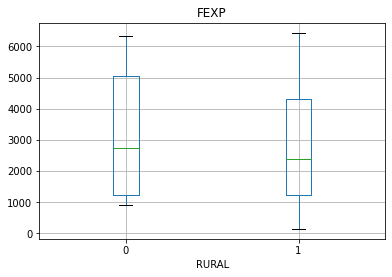

In [152]:
b_p = df.boxplot(column='FEXP', by='RURAL')
b_p.get_figure().suptitle('')

In [ ]:
#А посмотрим, сколько было всего значений в выборках:

print('За городом - ', len(x))
print('В городе - ', len(y))
print('Всего - ', len(df))

За городом -  34
В городе -  18
Всего -  52


Ту-то всё и встало на свои места! У нас мало значений, поэтому такие непонятные гистограммы. Было бы значений больше, наверно, мы б получили более красивые колоколообразные рисунки. Или наоборот - увидели бы, что распределения значений сильно отклоняются от нормальных. 
##Главный вывод: мы не смогли отвергнуть гипотезу о том, что расходы в среднем одинаковые, поэтому будем считать, что расходы за городом и в городе равнозначны.